# QQ plot Example


* [QQ plot - wikipedia](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot)
* [statsmodels docmentation](https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html)


## Interactive Plot

### QQ plot of $\mathbf{N}(\mu, \sigma^2)$ against  $\mathbf{N}(0, 1)$ 

* Sample quantle: $X_{(i)}$
* theoretical quantile: $\Phi^{-1}(i/n)$

The points $(\Phi^{-1}(i/n)$,  $X_{(i)})\quad (i=1,\cdots,n) $ apper to be on $y=\sigma x + \mu$.


In [32]:
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Button

# Set random seed for reproducibility
np.random.seed(42)

# Interactive plotting function
def plot_qq_and_cdf(mu=10, std_dev=2):
    # Generate samples from normal distribution with given mu and std_dev
    sample_size = 1000
    normal_data = np.random.normal(mu, std_dev, sample_size)
    
    # Create figure with two subplots for QQ plot and CDF plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # QQ plot in the first subplot
    sm.qqplot(normal_data, line='45', ax=ax1)  
    
    # Plot y = sigma * x + mu and y = x for QQ plot
    theoretical_quantiles = np.linspace(-3, 3, 1000)
    transformed_quantiles = std_dev * theoretical_quantiles + mu
    ax1.plot(theoretical_quantiles, transformed_quantiles, label="$y= \\sigma x + \\mu$", color="pink")

    # Set labels and title for QQ plot
    ax1.set_xlabel("Theoretical Quantiles (N(0,1))")
    ax1.set_ylabel(f"Sample Quantiles (N({mu:.2f}, {std_dev**2:.2f}))")
    ax1.set_title(f"QQ Plot: N({mu:.2f},{std_dev ** 2:.2f}) vs. N(0,1)")
    ax1.grid(True)
    ax1.legend()

    # Empirical CDF plot in the second subplot
    sorted_data = np.sort(normal_data)
    empirical_cdf = np.arange(1, sample_size + 1) / sample_size
    
    # Calculate theoretical CDF for N(0,1)
    x_cdf = np.linspace(-5, 5, 1000)
    theoretical_cdf = stats.norm.cdf(x_cdf, loc=0, scale=1)
    
    # Plot empirical CDF and theoretical CDF
    ax2.step(sorted_data, empirical_cdf, label='Empirical CDF', where='post')
    ax2.plot(x_cdf, theoretical_cdf, label='Theoretical CDF (N(0,1))', color='orange')
    
    # Set labels and title for CDF plot
    ax2.set_xlabel("Value")
    ax2.set_ylabel("CDF")
    ax2.set_title("Empirical CDF vs. Theoretical CDF (N(0,1))")
    ax2.grid(True)
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

# Reset function for sliders
def reset_sliders(b):
    mu_slider.value = 0
    std_dev_slider.value = 2

# Create reset button
reset_button = Button(description="Reset to Default")
reset_button.on_click(reset_sliders)
display(reset_button)

# Sliders for mu and std_dev
mu_slider = FloatSlider(value=0, min=-10, max=10, step=0.1, description='Mu (μ)')
std_dev_slider = FloatSlider(value=2, min=0.05, max=10, step=0.1, description='Sigma (σ)')

# Interactive plot
interact(plot_qq_and_cdf, mu=mu_slider, std_dev=std_dev_slider)


Button(description='Reset to Default', style=ButtonStyle())

interactive(children=(FloatSlider(value=0.0, description='Mu (μ)', max=10.0, min=-10.0), FloatSlider(value=2.0…

<function __main__.plot_qq_and_cdf(mu=10, std_dev=2)>

## QQ Plot of Unif(a,b) against N(0,1)

In [39]:
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatRangeSlider, Button

# Interactive plotting function
def plot_qq_and_cdf(a_b=(0, 1)):
    a, b = a_b
    sample_size = 100
    uniform_data = np.random.uniform(a, b, sample_size)

    # Create figure and axis for QQ plot and CDF
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # QQ Plot using statsmodels
    sm.qqplot(uniform_data, line='45', ax=ax1)  
    ax1.set_xlabel("Theoretical Quantiles (N(0,1))")
    ax1.set_ylabel(f"Sample Quantiles (Uniform({a:.2f}, {b:.2f}))")
    ax1.set_title(f"QQ Plot: Uniform({a:.2f}, {b:.2f}) vs. N(0,1)")
    ax1.grid(True)
    #ax1.legend()
    ax1.axis('equal')

    # CDF Plot
    # Calculate empirical CDF
    uniform_data.sort()
    empirical_cdf = np.arange(1, sample_size + 1) / sample_size

    # Calculate theoretical CDF for N(0,1) using statsmodels
    x_cdf = np.linspace(-5, 5, 1000)
    theoretical_cdf = stats.norm.cdf(x_cdf, loc=0, scale=1)

    # Plot empirical and theoretical CDFs
    ax2.step(uniform_data, empirical_cdf, label='Empirical CDF', where='post')
    ax2.plot(x_cdf, theoretical_cdf, label='Theoretical CDF (N(0,1))', color='orange')
    ax2.axvline(x=a, linestyle="--", color="green", linewidth="1", label=f"a={a:.2f}")
    ax2.axvline(x=b, linestyle="--", color="c", linewidth="1", label=f"b={b:.2f}")

    ax2.set_xlabel("Value")
    ax2.set_ylabel("CDF")
    ax2.set_title(f"Empirical CDF of Unif({a:.2f},{b:.2f}) vs. Theoretical CDF (N(0,1))")
    ax2.grid(True)
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Function to reset the slider values
def reset_sliders(b):
    a_b_slider.value = (0, 1)  # Reset to initial values

# Range slider for a and b
a_b_slider = FloatRangeSlider(
    value=(0, 1), 
    min=-20, 
    max=20, 
    step=0.1, 
    description='Range [a, b]',
    layout={'width': '600px'}
)

# Create reset button
reset_button = Button(description="Reset to Default")
reset_button.on_click(reset_sliders)
display(reset_button)

# Interactive plot
interact(plot_qq_and_cdf, a_b=a_b_slider)


Button(description='Reset to Default', style=ButtonStyle())

interactive(children=(FloatRangeSlider(value=(0.0, 1.0), description='Range [a, b]', layout=Layout(width='600p…

<function __main__.plot_qq_and_cdf(a_b=(0, 1))>

## Compare similar distributions using qq plot

### QQ plot of $Y=-\log(1-\text{Unif}(0,1))$ against $\mathbf{Exp}(1)$

Generate Exp(1) using [the inverse transform sampling method](https://en.wikipedia.org/wiki/Inverse_transform_sampling) as follows:

$$
Y = -\log(1 - U) \sim \text{Exp}(1) \quad \text{where} \quad U \sim \text{Unif}(0,1)
$$


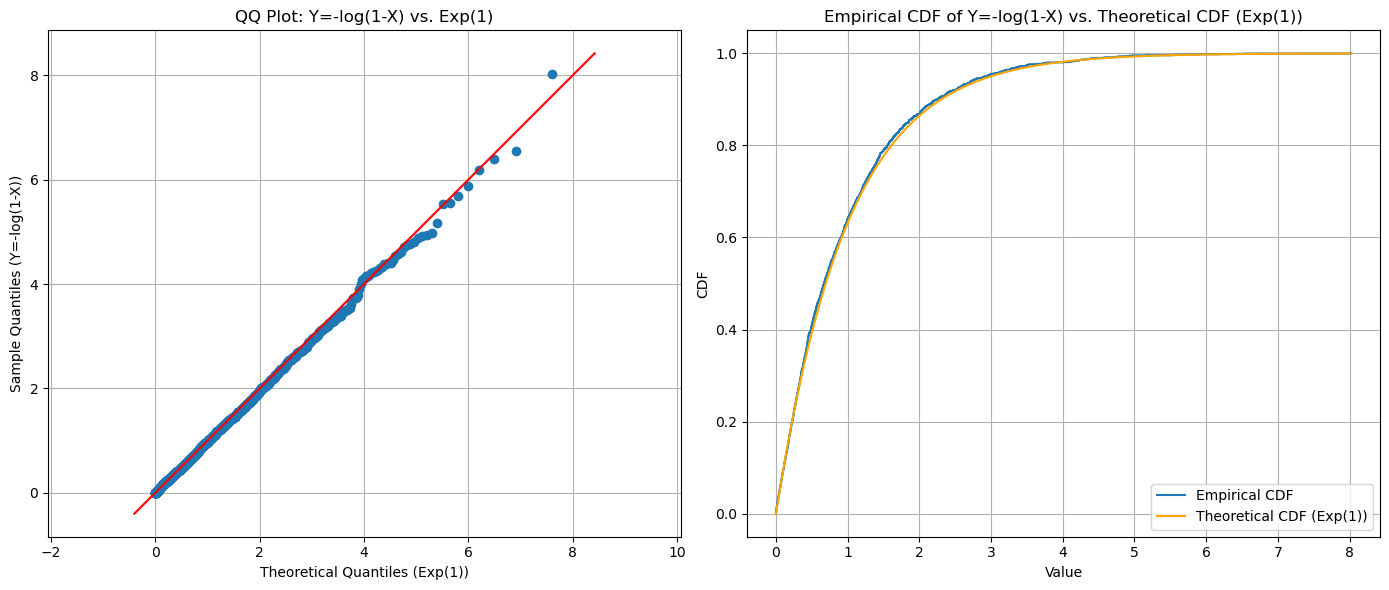

In [47]:
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatRangeSlider, Button

# Generate random numbers Exp(1) from Unif(0,1)
sample_size = 2000
x = np.random.rand(sample_size)  
sample_y = -np.log(1 - x)
sample_y.sort()

# Create figure and axis for QQ plot and CDF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# QQ Plot using statsmodels
sm.qqplot(sample_y, line='45', dist=stats.expon, ax=ax1)  
ax1.set_xlabel("Theoretical Quantiles (Exp(1))")
ax1.set_ylabel(f"Sample Quantiles (Y=-log(1-X))")
ax1.set_title(f"QQ Plot: Y=-log(1-X) vs. Exp(1)")
ax1.grid(True)
#ax1.legend()
ax1.axis('equal')

# CDF Plot
# Calculate empirical CDF
empirical_cdf = np.arange(1, sample_size + 1) / sample_size

# Calculate theoretical CDF for Exp(1) using statsmodels
x_cdf = np.linspace(0, max(sample_y), 1000)
theoretical_cdf = stats.expon.cdf(x_cdf, loc=0, scale=1)

# Plot empirical and theoretical CDFs
ax2.step(sample_y, empirical_cdf, label='Empirical CDF', where='post')
ax2.plot(x_cdf, theoretical_cdf, label='Theoretical CDF (Exp(1))', color='orange')

ax2.set_xlabel("Value")
ax2.set_ylabel("CDF")
ax2.set_title(f"Empirical CDF of Y=-log(1-X) vs. Theoretical CDF (Exp(1))")
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()


### QQ plot of $Z=\sqrt{-2\log (U_1)} \cos({2 \pi U_2})$ against $N(0,1)$

Generate $N(0,1)$ using [the inverse transform sampling method](https://en.wikipedia.org/wiki/Inverse_transform_sampling) as follows:

$$
\begin{aligned}
Z_1 & = \sqrt{-2 \log(U_1)} \cos(2 \pi U_2)\\
Z_2 & = \sqrt{-2 \log(U_1)} \sin(2 \pi U_2)\\
\end{aligned}
$$

where $U_1, U_2 \overset{\text{iid}}\sim \text{Uniform}(0, 1)$.

This transformation is called [The Box–Muller transform](https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform)

Compare the two random variables using QQ plot.
 

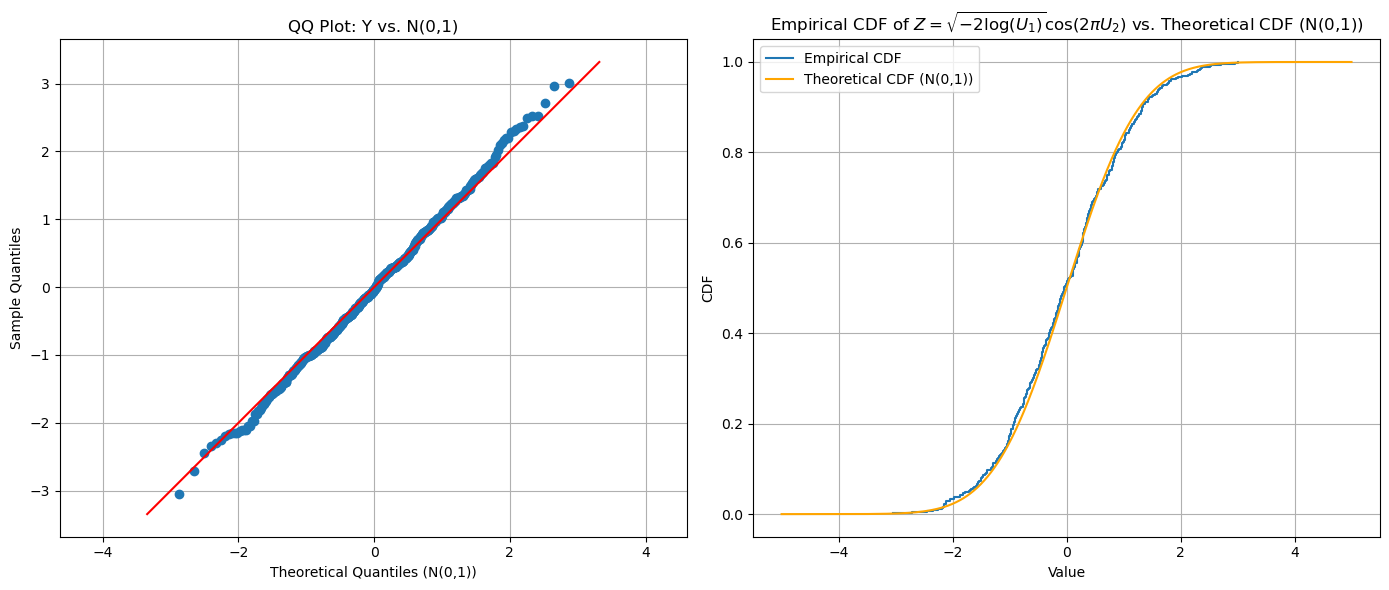

In [51]:
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatRangeSlider, Button

# Generate random numbers Exp(1) from Unif(0,1)
sample_size = 500
u1 = np.random.rand(sample_size)  
u2 = np.random.rand(sample_size)

# Transform to obtain sample_y
sample_y = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
sample_y.sort()

# Create figure and axis for QQ plot and CDF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# QQ Plot using statsmodels
sm.qqplot(sample_y, line='45', ax=ax1)  

ax1.set_xlabel("Theoretical Quantiles (N(0,1))")
ax1.set_ylabel(f"Sample Quantiles")
ax1.set_title(f"QQ Plot: Y vs. N(0,1)")
ax1.grid(True)
#ax1.legend()
ax1.axis('equal')

# CDF Plot
# Calculate empirical CDF
empirical_cdf = np.arange(1, sample_size + 1) / sample_size

# Calculate theoretical CDF for N(0,1) using statsmodels
x_cdf = np.linspace(-5, 5, 1000)
theoretical_cdf = stats.norm.cdf(x_cdf, loc=0, scale=1)

# Plot empirical and theoretical CDFs
ax2.step(sample_y, empirical_cdf, label='Empirical CDF', where='post')
ax2.plot(x_cdf, theoretical_cdf, label='Theoretical CDF (N(0,1))', color='orange')

ax2.set_xlabel("Value")
ax2.set_ylabel("CDF")
ax2.set_title("Empirical CDF of $Z=\\sqrt{-2\\log (U_1)} \\cos({2 \\pi U_2})$ vs. Theoretical CDF (N(0,1))")
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()


## scipy.stats also can qq-plot



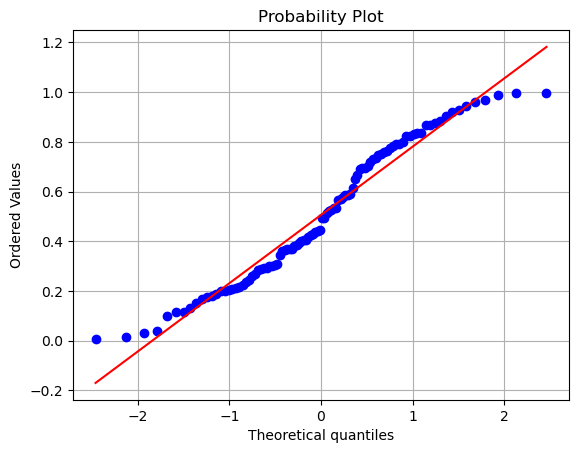

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

n = 100
data = np.random.rand(n)
fig, ax = plt.subplots()

# QQ plot
stats.probplot(data, dist="norm", plot=ax)
ax.grid(True)